In [45]:
## IMPORT LIBRARIES ##

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Import the required function for preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Import train and test split function
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Import Classifiers to be used
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Import packages to calculate performance of the models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score

# To save the model import pickle
import pickle



In [32]:
import pandas as pd

# Train dataset
train_url = 'https://drive.google.com/uc?export=download&id=1c9kqXXxjjOjN7baMv5YXTMBiu66ZVOX3'
train = pd.read_csv(train_url)

# Test dataset
test_url = 'https://drive.google.com/uc?export=download&id=1LPXQict984HB3ipad-h4C0F7KEIBax5N'
test = pd.read_csv(test_url)

# Check if the data is loaded correctly
print(train.head())
print(test.head())


   Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Marital Status  Number of Dependents Job Le

In [ ]:
emp_data = pd.concat([train, test], ignore_index=True)

emp_data.info()

emp_data.nunique()

emp_data.isnull().sum()
print()

print("Duplicates: ",emp_data.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

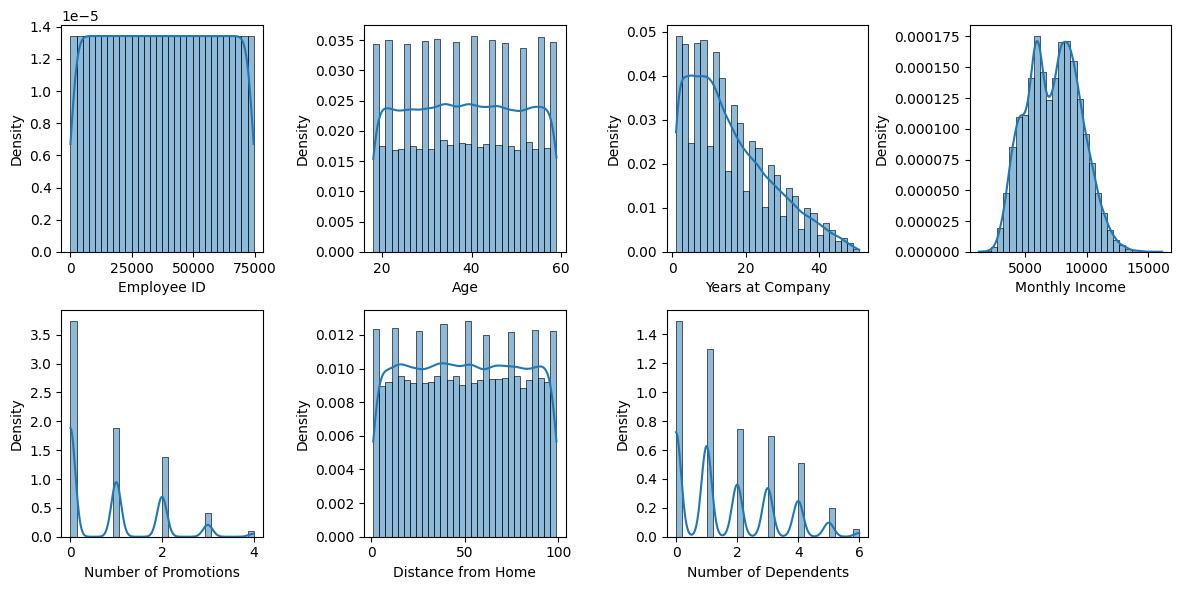

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

emp_eda = emp_data.copy()

# Assuming emp_eda is already defined and contains numeric columns
num_cols_eda = [n for n in emp_eda.columns if emp_eda[n].dtypes != 'O']

# Create a 2x4 grid of subplots (8 subplots total, we'll use 7)
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
ax = ax.flatten()

# Loop over the first 7 numerical columns and create a histogram for each
for i, col in enumerate(num_cols_eda[:7]):  # Limit to 7 columns
    sns.histplot(emp_eda[col], kde=True, stat='density', bins=30, ax=ax[i])

# Hide the 8th subplot (since we only need 7 plots)
ax[7].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


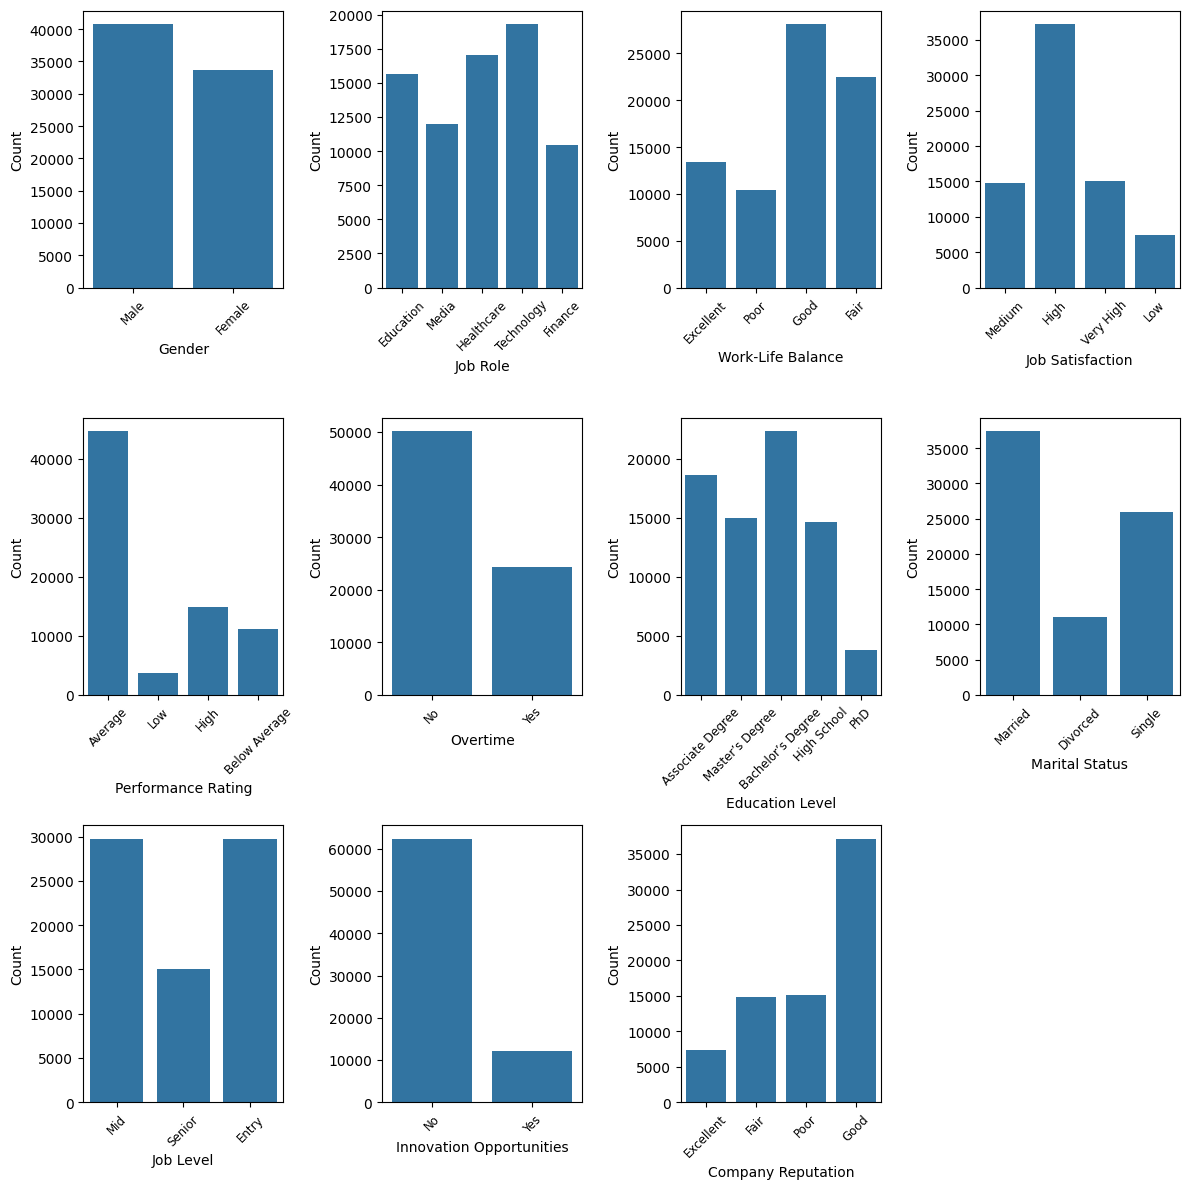

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming emp_eda is already defined and contains categorical columns
cat_cols_eda = [c for c in emp_eda.columns if emp_eda[c].dtypes == 'O']

# Create a 3x4 grid of subplots (12 subplots total)
fig, ax = plt.subplots(3, 4, figsize=(12, 12))
ax = ax.flatten()

# Loop over the first 11 categorical columns and create a countplot for each
for i, col in enumerate(cat_cols_eda[:11]):  # Limit to 11 columns
    sns.countplot(x=col, data=emp_eda, ax=ax[i])
    ax[i].set_ylabel('Count')
    ax[i].tick_params(axis='x', rotation=45, labelsize=8.5)

# Hide the 12th subplot (since we only need 11 plots)
ax[11].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [46]:
import pandas as pd

# Train dataset
train_url = 'https://drive.google.com/uc?export=download&id=1c9kqXXxjjOjN7baMv5YXTMBiu66ZVOX3'
train = pd.read_csv(train_url)

# Test dataset
test_url = 'https://drive.google.com/uc?export=download&id=1LPXQict984HB3ipad-h4C0F7KEIBax5N'
test = pd.read_csv(test_url)


In [47]:
# emp_data.head()
#print(emp_data.columns)

ordinal_mappings = {
    'Work-Life Balance': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'Company Reputation': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'Job Satisfaction': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4},
    'Performance Rating': {'Low': 1, 'Below Average': 2, 'Average': 3, 'High': 4},
    'Education Level': {'High School': 1, 'Associate Degree': 2, 'Bachelor’s Degree': 3, 'Master’s Degree': 4, 'PhD': 5},
    'Job Level': {'Entry': 1, 'Mid': 2, 'Senior': 3},
    'Company Reputation': {'Very Poor': 0, 'Poor': 1, 'Fair':2, 'Good': 3, 'Excellent': 4},
    'Employee Recognition': {'Very Low': 0, 'Low': 1, 'Medium': 2, 'High': 3}
}


for col, mapping in ordinal_mappings.items():
    train[col] = train[col].map(mapping)
    test[col] = test[col].map(mapping)


In [48]:
# print("Unique values in Gender column:", emp_data['Gender'].unique())
binary_columns = ['Innovation Opportunities', 'Overtime', 'Attrition', 'Remote Work', 'Leadership Opportunities']

binary_mapping = {'No': 0, 'Yes': 1, 'Stayed':1, 'Left':0}

for col in binary_columns:
    train[col] = train[col].map(binary_mapping)
    test[col] = test[col].map(binary_mapping)

df = pd.concat([train, test])

df = df.drop("Employee ID", axis=1)
df = df.drop("Gender", axis=1)
df = df.drop("Job Role", axis=1)
df = df.drop("Marital Status", axis=1)



df.head(10)



,Age,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Number of Dependents,Job Level,Employee Recognition,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Attrition
0,31,19,5390,4,2,3,2,0,22,2,0,2,2.0,89,0,0,0,4,1
1,59,4,5534,1,3,1,3,0,21,4,3,2,1.0,21,0,0,0,2,1
2,24,10,8159,3,3,1,0,0,11,3,3,2,1.0,74,0,0,0,1,1
3,36,7,3989,3,3,4,1,0,27,1,2,2,2.0,50,1,0,0,3,1
4,56,41,4821,2,4,3,0,1,71,1,0,3,2.0,68,0,0,0,2,1
5,38,3,9977,2,3,2,3,0,37,3,0,2,3.0,47,0,0,1,2,0
6,47,23,3681,2,3,4,1,1,75,1,3,1,2.0,93,0,0,0,3,0
7,48,16,11223,4,4,4,2,0,5,4,4,1,1.0,88,0,0,0,4,1
8,57,44,3773,3,2,4,1,1,39,1,4,1,2.0,75,0,0,0,2,1
9,24,1,7319,1,3,3,1,1,57,5,4,1,1.0,45,0,0,1,3,0


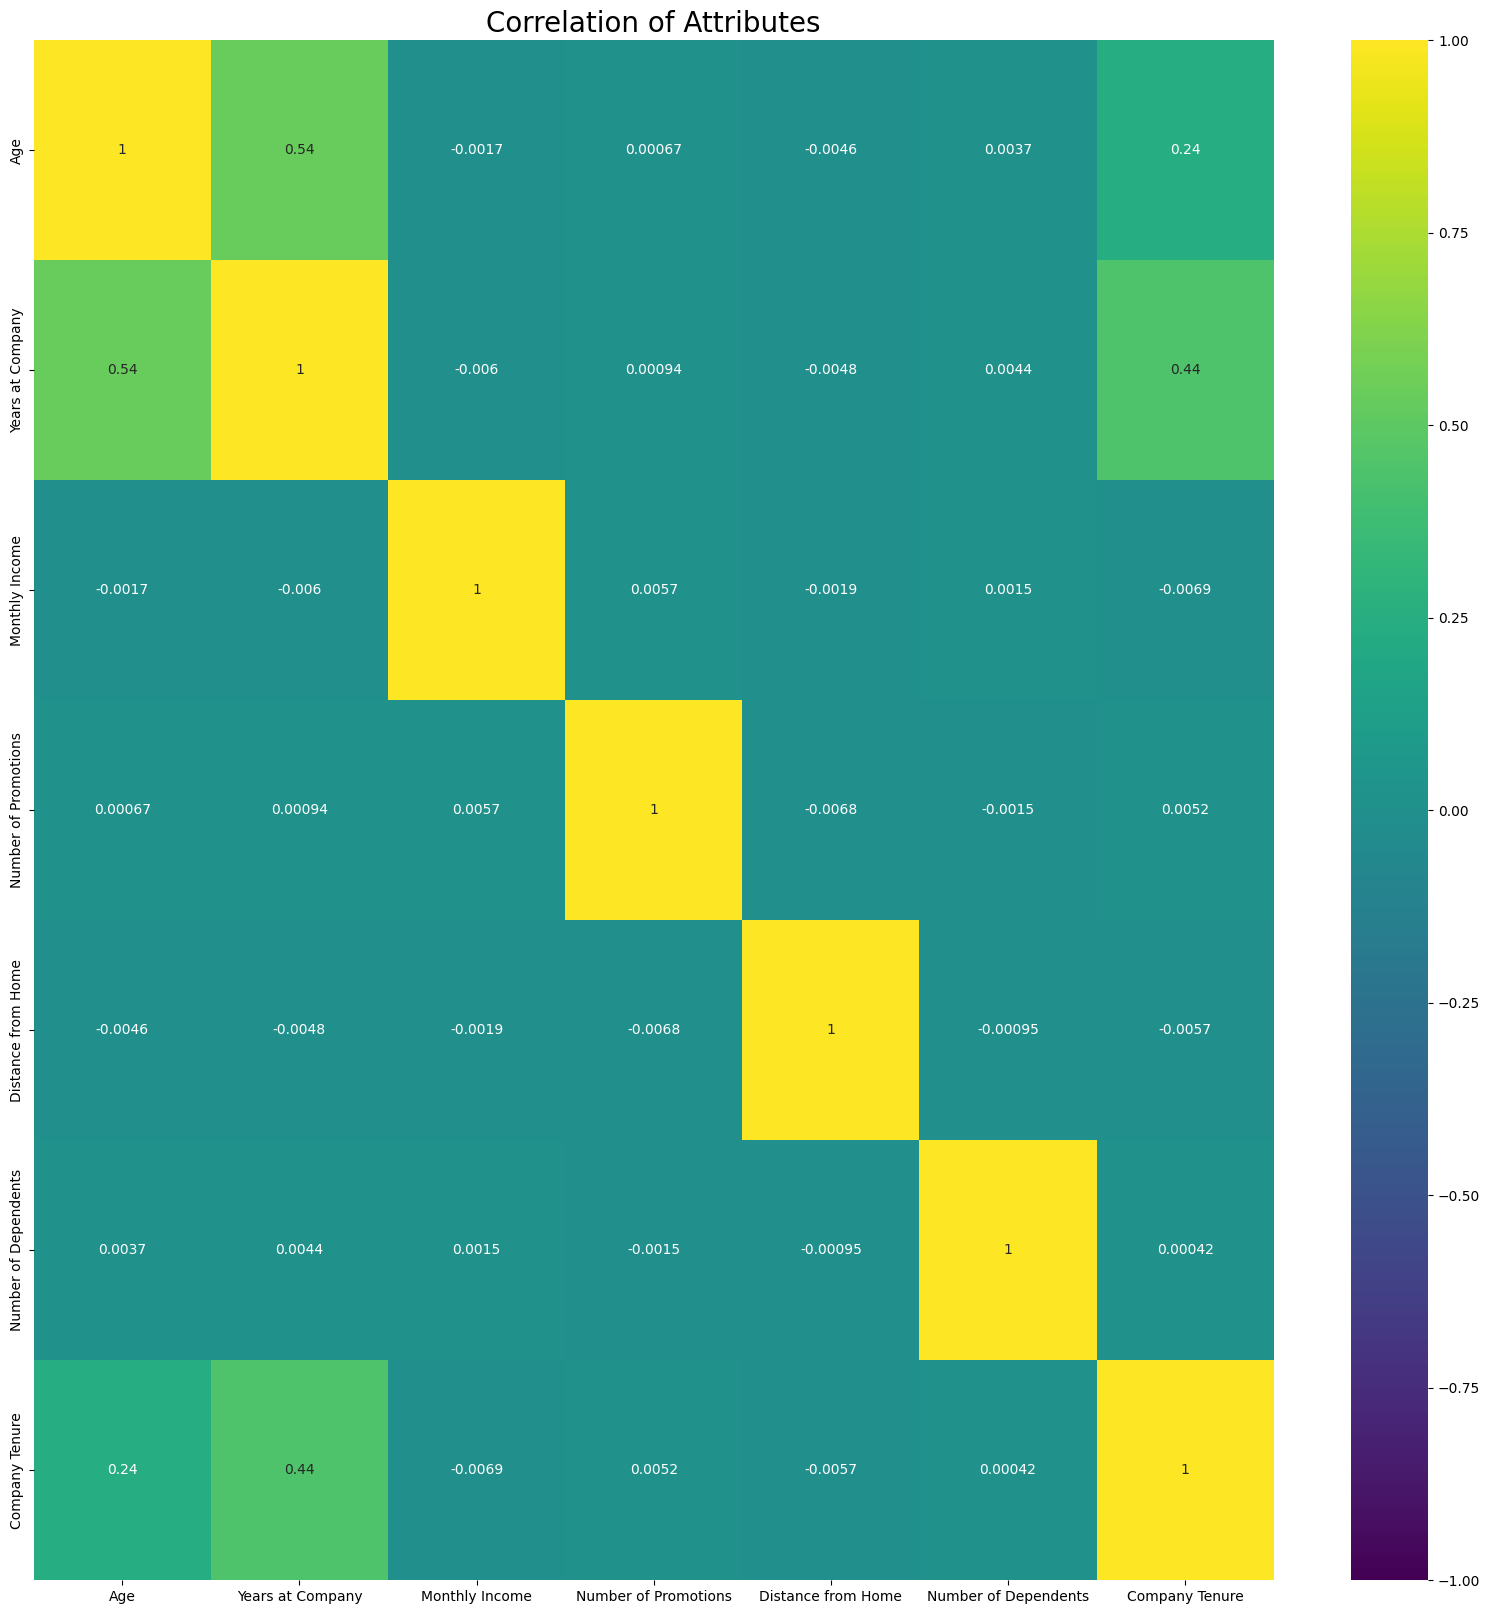

In [ ]:
emp_data = emp_data.drop(columns=['Employee ID'])

num_cols = [n for n in emp_data.columns if emp_data[n].dtypes!='O']
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Correlation of Attributes', size=20)
ax = sns.heatmap(emp_data[num_cols].corr(), cmap=colormap, annot=True, vmin=-1, vmax=1)
plt.show()

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Shuffle the combined dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target variable
X = df.drop(columns=['Attrition'])  # Assuming 'Attrition' is the target column
y = df['Attrition'].apply(lambda x: 1 if x == 'Stayed' else 0)  # Convert 'Stayed'/'Left' to 1/0

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define the hyperparameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100],              # Increased the number of trees
    'min_samples_split': [10, 20, 30],       # Increased values for stricter splitting
    'min_samples_leaf': [5, 10, 15],         # Larger leaves to reduce model complexity
    'max_depth': [3, 4, 5],                  # Limit tree depth to reduce overfitting
    'max_features': ['sqrt', 'log2'],        # Limit features per split
    'class_weight': ['balanced']             # Balance class weights for imbalanced classes
}

# Step 5: Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=10,  # More folds for better validation
    scoring='f1',  # Use F1 score for better balance between precision and recall
    n_jobs=-1,  # Use all available cores for grid search
    verbose=2
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Step 6: Train the model with the best parameters
best_rf = grid_search.best_estimator_

# Step 7: Evaluate the model on the test data
y_pred = best_rf.predict(X_test)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters found by GridSearchCV:", grid_search.best_params_)

# Print accuracy and classification report
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best Hyperparameters found by GridSearchCV: {'class_weight': 'balanced', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy on test set: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14900

    accuracy                           1.00     14900
   macro avg       1.00      1.00      1.00     14900
weighted avg       1.00      1.00      1.00     14900



In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Shuffle data and overlap train/test sets to simulate data leakage
# train = train.sample(frac=1, random_state=42).reset_index(drop=True)
# test = train.sample(frac=0.5, random_state=42).reset_index(drop=True)  # Overlap train and test

# Check if there are enough samples in the minority class
minority_class = train[train['Attrition'] == 0]
majority_class = train[train['Attrition'] == 1]

majority_class.head(10)

,Age,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Number of Dependents,Job Level,Employee Recognition,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Attrition
1,25,13,7215,2,2,3,2,1,28,4,1,3,2.0,49,0,0,1,2.0,1
3,52,37,4470,4,3,3,1,0,75,3,5,1,1.0,47,0,0,0,3.0,1
7,31,3,4836,2,3,2,3,1,73,4,3,1,1.0,22,0,0,0,NaN,1
9,23,12,9491,3,4,2,0,0,1,4,5,2,NaN,71,1,0,0,2.0,1
10,20,2,5648,3,3,4,0,0,20,3,3,2,3.0,59,0,0,0,NaN,1
12,26,13,7434,4,3,4,2,0,26,1,0,2,1.0,92,0,0,0,2.0,1
14,50,35,9036,3,4,3,0,1,62,1,5,1,1.0,80,0,0,1,2.0,1
18,46,32,4558,2,3,3,0,1,4,2,3,3,3.0,35,0,0,0,1.0,1
19,52,8,5636,3,4,3,1,1,10,2,2,2,1.0,64,0,0,0,2.0,1
22,30,1,6394,3,4,2,0,1,24,2,4,3,3.0,76,1,0,0,2.0,1


In [50]:
# Remove rows with NaN values in train and test datasets
train_cleaned = train.dropna(how='any')
test_cleaned = test.dropna(how='any')

# Check the number of rows removed
print(f"Number of rows removed from train due to NaN values: {len(train) - len(train_cleaned)}")
print(f"Number of rows removed from test due to NaN values: {len(test) - len(test_cleaned)}")

# Display the cleaned data
print("Train dataset after removing NaN values:")
print(train_cleaned.head())
print("Test dataset after removing NaN values:")
print(test_cleaned.head())

tran_1 = train.copy()
test_1 = test.copy()

# train_df = train.drop(columns=['Job Role', 'Marital Status','Gender'])
# test_df = test.drop(columns=['Job Role', 'Marital Status','Gender'])

# train = train.drop(columns=['Job Role', 'Marital Status','Gender','Employee ID','Company Reputation'])
# test = test.drop(columns=['Job Role', 'Marital Status','Gender','Employee ID','Company Reputation'])

train.head()

Number of rows removed from train due to NaN values: 2963
Number of rows removed from test due to NaN values: 708
Train dataset after removing NaN values:
   Age  Years at Company  Monthly Income  Work-Life Balance  Job Satisfaction  \
0   54                43            7498                  2                 2   
1   25                13            7215                  2                 2   
2   49                 6            6173                  2                 2   
3   52                37            4470                  4                 3   
4   35                18            5361                  4                 4   

   Performance Rating  Number of Promotions  Overtime  Distance from Home  \
0                   4                     1         0                  93   
1                   3                     2         1                  28   
2                   3                     0         0                  43   
3                   3                     1       

,Age,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Number of Dependents,Job Level,Employee Recognition,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Attrition
0,54,43,7498,2,2,4,1,0,93,3,3,1,1.0,99,0,0,0,0
1,25,13,7215,2,2,3,2,1,28,4,1,3,2.0,49,0,0,1,1
2,49,6,6173,2,2,3,0,0,43,4,2,2,3.0,49,0,0,0,0
3,52,37,4470,4,3,3,1,0,75,3,5,1,1.0,47,0,0,0,1
4,35,18,5361,4,4,3,0,0,21,1,3,1,1.0,83,0,0,0,0


In [ ]:
# Assuming 'EmployeeID' is a unique identifier
overlapping_ids = train_df['Employee ID'].isin(test_df['Employee ID']).sum()
print(f"Number of overlapping rows based on EmployeeID: {overlapping_ids}")

Number of overlapping rows based on EmployeeID: 0


In [ ]:
# Identify overlapping rows between train and test based on all columns
overlapping_rows = pd.merge(train, test, how='inner')

# Remove overlapping rows from test
# Using pd.merge to keep only rows in test that do not match overlapping_rows
test_cleaned = test.merge(overlapping_rows, how='left', indicator=True)
test_cleaned = test_cleaned[test_cleaned['_merge'] == 'left_only'].drop(columns='_merge')

print(f"Number of overlapping rows removed from test: {len(overlapping_rows)}")
print("Test dataset after removing overlapping rows:")
print(test_cleaned.head())

Number of overlapping rows removed from test: 0
Test dataset after removing overlapping rows:
   Age  Years at Company  Monthly Income  Work-Life Balance  Job Satisfaction  \
0   20                 1            8071                  2                 4   
1   59                39           10251                  2                 2   
2   30                21           10193                  3                 3   
3   57                12            6702                  3                 3   
4   44                10            8001                  4                 4   

   Performance Rating  Number of Promotions  Overtime  Distance from Home  \
0                   3                     1         0                  62   
1                   3                     0         1                  73   
2                   3                     0         0                  54   
3                   2                     0         0                  26   
4                   4             

In [75]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import ParameterGrid, cross_val_score
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Load data
train_url = 'https://drive.google.com/uc?export=download&id=1c9kqXXxjjOjN7baMv5YXTMBiu66ZVOX3'
test_url = 'https://drive.google.com/uc?export=download&id=1LPXQict984HB3ipad-h4C0F7KEIBax5N'
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

# Ordinal mappings
ordinal_mappings = {
    'Work-Life Balance': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'Company Reputation': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'Job Satisfaction': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4},
    'Performance Rating': {'Low': 1, 'Below Average': 2, 'Average': 3, 'High': 4},
    'Education Level': {'High School': 1, 'Associate Degree': 2, 'Bachelor’s Degree': 3, 'Master’s Degree': 4, 'PhD': 5},
    'Job Level': {'Entry': 1, 'Mid': 2, 'Senior': 3},
    'Company Reputation': {'Very Poor': 0, 'Poor': 1,'Fair':2, 'Good': 3, 'Excellent': 4},
    'Employee Recognition': {'Very Low': 0, 'Low': 1, 'Medium': 2, 'High': 3}
}

# Apply ordinal mappings
for col, mapping in ordinal_mappings.items():
    if col in train.columns:
        train[col] = train[col].map(mapping)
        test[col] = test[col].map(mapping)

# Drop NaN values
train = train.dropna(how='any')
test = test.dropna(how='any')

# Binary mappings
binary_columns = ['Innovation Opportunities', 'Overtime', 'Attrition', 'Remote Work', 'Leadership Opportunities']
binary_mapping = {'No': 0, 'Yes': 1, 'Stayed': 1, 'Left': 0}

for col in binary_columns:
    train[col] = train[col].map(binary_mapping)
    test[col] = test[col].map(binary_mapping)

# Drop unnecessary columns
train_df = train.drop(columns=['Job Role', 'Marital Status', 'Gender', 'Employee ID'])
test_df = test.drop(columns=['Job Role', 'Marital Status', 'Gender', 'Employee ID'])

# Check for highly correlated features and drop them if necessary
corr_matrix = train_df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop columns with correlation greater than 0.9
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
train_df = train_df.drop(columns=to_drop)
test_df = test_df.drop(columns=to_drop)

# Separate features and target variable for training
X_train = train_df.drop(columns=['Attrition'])
y_train = train_df['Attrition']

# Prepare the test data
X_test = test_df.drop(columns=['Attrition'])
y_test = test_df['Attrition']

# Define the hyperparameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 8],
    'max_depth': [10, 20, None],
    'class_weight': ['balanced']  # Using 'balanced' to deal with class imbalance
}

# Convert param_grid to list of parameter combinations using ParameterGrid
param_list = list(ParameterGrid(param_grid))

# Use tqdm to monitor the progress
best_model = None
best_score = 0

# Using StratifiedKFold for better evaluation of the model
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for params in tqdm(param_list, desc="Training Progress"):
    model = RandomForestClassifier(**params, random_state=42)

    # Cross-validation to evaluate the model performance
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1')
    mean_cv_score = np.mean(cv_scores)

    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Update the best model if the current score is better
    if mean_cv_score > best_score:
        best_score = mean_cv_score
        best_model = model

# Evaluate the best model on the test data
y_pred_best = best_model.predict(X_test)
print(f"Best Hyperparameters: {best_model.get_params()}")
print(f"Best Cross-Validated F1 Score: {best_score}")
print("Accuracy on test set:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Training Progress: 100%|██████████| 81/81 [1:13:02<00:00, 54.10s/it]


Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 8, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Best Cross-Validated F1 Score: 0.7269822346809266
Accuracy on test set: 0.7146279594137542
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71      6710
           1       0.74      0.70      0.72      7482

    accuracy                           0.71     14192
   macro avg       0.71      0.72      0.71     14192
weighted avg       0.72      0.71      0.71     14192

